# Sentiment Analysis using NLP

## Description
• Develop a pipeline for sentiment analysis on text data (e.g., product re-
views, social media posts).

• Implement classification of sentiment (positive, negative, neutral).

• You can split your data into testing, training, and validation sets.

• Perform necessary pre-processing on the data to prepare it for analysis.

• Optimize the pipeline for eﬀicient sentiment classification.

• Feel free to use any technique of feature extraction or representation.

• You can use Deep Learning Methods and compare their performance with
traditional NLP approaches. (optional)

## What to turn in:
1. Project documentation (details given below)

2. Report of any resources you use

3. Your source code in a Jupyter Notebook with comments

## Project Documentation:
Ensure that the documentation is clear and easy to follow. 

Raw Python output or unformatted screen dumps are not acceptable. 

Do not include code in the documentation. 

Provide enough details for the reader to understand your methodology and reproduce your results or achieve similar outcomes. 

Avoid vague statements like “I used a text classification algorithm” without specifying which algorithm. 

Focus on the technical aspects rather than implementation details.

### Document Structure:
1. Introduction: State the problem and your objectives for the sentiment
analysis task

2. Data description: Describe the dataset used (source, number of instances,
features, division between training and testing, etc.)

3. Baseline experiments: State the goal, present initial experiments, and
provide conclusions

4. Advanced experiments: For each experiment, include goal, methodology,
results, and conclusion

5. Overall conclusion

### Additional Requirements:
• List all tools and libraries used (you may use any tool or programming
language you’re comfortable with)

• List any external resources or pre-trained models used

• Include captioned tables and figures for clarity

• Compare your results to existing benchmarks in sentiment analysis when
possible

## Reflection Questions:
After completing your experiments, answer the following: 
1. What was the biggest challenge you faced in implementing sentiment analysis? 
2. What insights did you gain about NLP and sentiment analysis through this project?

# Data Acquisition

Link: [Social Media Sentiments Analysis Dataset](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset)

The Social Media Sentiments Analysis Dataset captures a vibrant tapestry of emotions, trends, and interactions across various social media platforms. This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment, and more—shared by individuals worldwide.

It includes the following features:

Feature:  	Description

- Text: User-generated content showcasing sentiments
- Sentiment: Categorized emotions
- Timestamp:	Date and time information
- User    :	Unique identifiers of users contributing
- Platform:	Social media platform where the content originated
- Hashtags:	Identifies trending topics and themes
- Likes   :	Quantifies user engagement (likes)
- Retweets:	Reflects content popularity (retweets)
- Country :	Geographical origin of each post
- Year    :	Year of the post
- Month	   : Month of the post
- Day	   :     Day of the post
- Hour	   : Hour of the post

The data is split into training (70%), validation (15%), and testing (15%) sets.

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Machine learning model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, train_test_split 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import joblib

# deep learning model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical 

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras import regularizers


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CENTER_ELRahama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CENTER_ELRahama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CENTER_ELRahama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


load dataset

In [2]:
df = pd.read_csv(r'D:\Projects\sentiment-analysis-widebot\sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


good we don have missing values

check text columns

In [4]:
df.describe(include='object')

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
count,732,732,732,732,732,732,732
unique,707,279,683,685,4,697,115
top,"A compassionate rain, tears of empathy fallin...",Positive,2022-07-17 06:15:00,WindWhisperer,Instagram,#Compassionate #TearsOfEmpathy,USA
freq,3,44,3,3,258,3,59


1. - in column `Text` we have duplicate same text in three columns -> fre = 3 

2. - in column `Sentiment` we have `279 different sentiment` so we clssifiy them together into three sentiment

In [5]:
df[df['Text'].str.contains("A compassionate rain, tears of empathy fallin")]

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
264,265,269,"A compassionate rain, tears of empathy fallin...",Compassionate,2021-07-01 12:10:00,RainNurturer,Facebook,#Compassionate #TearsOfEmpathy,21.0,42.0,Canada,2021,7,1,12
278,279,283,"A compassionate rain, tears of empathy fallin...",Compassionate,2021-07-01 12:10:00,RainNurturer,Instagram,#Compassionate #TearsOfEmpathy,21.0,42.0,Canada,2021,7,1,12
292,293,297,"A compassionate rain, tears of empathy fallin...",Compassionate,2021-07-01 12:10:00,RainNurturer,Instagram,#Compassionate #TearsOfEmpathy,21.0,42.0,Canada,2021,7,1,12


In [6]:
df['Text'].duplicated().sum()

25

we will remove duplicates

In [7]:
df.drop_duplicates(subset=['Text'], inplace=True)

In [8]:
df['Text'].duplicated().sum()

0

let's go to column `sentiment`

In [9]:
df['Sentiment'].unique().tolist()

[' Positive  ',
 ' Negative  ',
 ' Neutral   ',
 ' Anger        ',
 ' Fear         ',
 ' Sadness      ',
 ' Disgust      ',
 ' Happiness    ',
 ' Joy          ',
 ' Love         ',
 ' Amusement    ',
 ' Enjoyment    ',
 ' Admiration   ',
 ' Affection    ',
 ' Awe          ',
 ' Disappointed ',
 ' Surprise     ',
 ' Acceptance   ',
 ' Adoration    ',
 ' Anticipation ',
 ' Bitter       ',
 ' Calmness     ',
 ' Confusion    ',
 ' Excitement   ',
 ' Kind         ',
 ' Pride        ',
 ' Shame        ',
 ' Confusion ',
 ' Excitement ',
 ' Shame ',
 ' Elation       ',
 ' Euphoria      ',
 ' Contentment   ',
 ' Serenity      ',
 ' Gratitude     ',
 ' Hope          ',
 ' Empowerment   ',
 ' Compassion    ',
 ' Tenderness    ',
 ' Arousal       ',
 ' Enthusiasm    ',
 ' Fulfillment  ',
 ' Reverence     ',
 ' Compassion',
 ' Fulfillment   ',
 ' Reverence ',
 ' Elation   ',
 ' Despair         ',
 ' Grief           ',
 ' Loneliness      ',
 ' Jealousy        ',
 ' Resentment      ',
 ' Frustration

opps, we need to clean up the sentiment labels by removing leading and trailing whitespace

In [10]:
df['Sentiment']= df['Sentiment'].str.strip()
df['Sentiment'].unique().tolist()

['Positive',
 'Negative',
 'Neutral',
 'Anger',
 'Fear',
 'Sadness',
 'Disgust',
 'Happiness',
 'Joy',
 'Love',
 'Amusement',
 'Enjoyment',
 'Admiration',
 'Affection',
 'Awe',
 'Disappointed',
 'Surprise',
 'Acceptance',
 'Adoration',
 'Anticipation',
 'Bitter',
 'Calmness',
 'Confusion',
 'Excitement',
 'Kind',
 'Pride',
 'Shame',
 'Elation',
 'Euphoria',
 'Contentment',
 'Serenity',
 'Gratitude',
 'Hope',
 'Empowerment',
 'Compassion',
 'Tenderness',
 'Arousal',
 'Enthusiasm',
 'Fulfillment',
 'Reverence',
 'Despair',
 'Grief',
 'Loneliness',
 'Jealousy',
 'Resentment',
 'Frustration',
 'Boredom',
 'Anxiety',
 'Intimidation',
 'Helplessness',
 'Envy',
 'Regret',
 'Curiosity',
 'Indifference',
 'Numbness',
 'Melancholy',
 'Nostalgia',
 'Ambivalence',
 'Determination',
 'Zest',
 'Hopeful',
 'Proud',
 'Grateful',
 'Empathetic',
 'Compassionate',
 'Playful',
 'Free-spirited',
 'Inspired',
 'Confident',
 'Bitterness',
 'Yearning',
 'Fearful',
 'Apprehensive',
 'Overwhelmed',
 'Jealous',


In [11]:
print(df['Sentiment'].str.strip().unique().tolist())

['Positive', 'Negative', 'Neutral', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Awe', 'Disappointed', 'Surprise', 'Acceptance', 'Adoration', 'Anticipation', 'Bitter', 'Calmness', 'Confusion', 'Excitement', 'Kind', 'Pride', 'Shame', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Curiosity', 'Indifference', 'Numbness', 'Melancholy', 'Nostalgia', 'Ambivalence', 'Determination', 'Zest', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited', 'Inspired', 'Confident', 'Bitterness', 'Yearning', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious', 'Dismissive', 'Thrill', 'Bitterswee

Positive Sentiments: Emotions like Happiness, Joy, Love, Admiration, Affection, Awe, Excitement, Pride, Contentment, Serenity, Gratitude, Hope, Empowerment, Compassion, Tenderness, Enthusiasm, Fulfillment, Reverence, Euphoria, Amusement, Enjoyment, etc.

Negative Sentiments: Emotions like Anger, Fear, Sadness, Disgust, Disappointment, Resentment, Frustration, Boredom, Anxiety, Intimidation, Helplessness, Envy, Regret, Loneliness, Jealousy, Shame, Despair, Grief, Heartache, etc.

Neutral Sentiments: Emotions that are neither strongly positive nor strongly negative, like Calmness, Acceptance, Indifference, Contemplation, Reflection, etc.

In [12]:
sentiment_mapping = {
    'Positive': 'Positive', 'Negative': 'Negative', 'Neutral': 'Neutral',
    'Anger': 'Negative', 'Fear': 'Negative', 'Sadness': 'Negative', 'Disgust': 'Negative',
    'Happiness': 'Positive', 'Joy': 'Positive', 'Love': 'Positive', 'Amusement': 'Positive',
    'Enjoyment': 'Positive', 'Admiration': 'Positive', 'Affection': 'Positive', 'Awe': 'Positive',
    'Disappointed': 'Negative', 'Surprise': 'Neutral', 'Acceptance': 'Neutral', 'Adoration': 'Positive',
    'Anticipation': 'Positive', 'Bitter': 'Negative', 'Calmness': 'Neutral', 'Confusion': 'Neutral',
    'Excitement': 'Positive', 'Kind': 'Positive', 'Pride': 'Positive', 'Shame': 'Negative',
    'Elation': 'Positive', 'Euphoria': 'Positive', 'Contentment': 'Positive', 'Serenity': 'Positive',
    'Gratitude': 'Positive', 'Hope': 'Positive', 'Empowerment': 'Positive', 'Compassion': 'Positive',
    'Tenderness': 'Positive', 'Arousal': 'Neutral', 'Enthusiasm': 'Positive', 'Fulfillment': 'Positive',
    'Reverence': 'Positive', 'Despair': 'Negative', 'Grief': 'Negative', 'Loneliness': 'Negative',
    'Jealousy': 'Negative', 'Resentment': 'Negative', 'Frustration': 'Negative', 'Boredom': 'Negative',
    'Anxiety': 'Negative', 'Intimidation': 'Negative', 'Helplessness': 'Negative', 'Envy': 'Negative',
    'Regret': 'Negative', 'Curiosity': 'Neutral', 'Indifference': 'Neutral', 'Numbness': 'Neutral',
    'Melancholy': 'Negative', 'Nostalgia': 'Neutral', 'Ambivalence': 'Neutral', 'Determination': 'Positive',
    'Zest': 'Positive', 'Hopeful': 'Positive', 'Proud': 'Positive', 'Grateful': 'Positive', 
    'Empathetic': 'Positive', 'Compassionate': 'Positive', 'Playful': 'Positive', 'Free-spirited': 'Positive', 
    'Inspired': 'Positive', 'Confident': 'Positive', 'Bitterness': 'Negative', 'Yearning': 'Neutral', 
    'Fearful': 'Negative', 'Apprehensive': 'Negative', 'Overwhelmed': 'Negative', 'Jealous': 'Negative', 
    'Devastated': 'Negative', 'Frustrated': 'Negative', 'Envious': 'Negative', 'Dismissive': 'Negative', 
    'Thrill': 'Positive', 'Bittersweet': 'Neutral', 'Overjoyed': 'Positive', 'Inspiration': 'Positive', 
    'Motivation': 'Positive', 'Contemplation': 'Neutral', 'JoyfulReunion': 'Positive', 'Satisfaction': 'Positive', 
    'Blessed': 'Positive', 'Reflection': 'Neutral', 'Appreciation': 'Positive', 'Confidence': 'Positive', 
    'Accomplishment': 'Positive', 'Wonderment': 'Positive', 'Optimism': 'Positive', 'Enchantment': 'Positive', 
    'Intrigue': 'Neutral', 'PlayfulJoy': 'Positive', 'Mindfulness': 'Positive', 'DreamChaser': 'Positive', 
    'Elegance': 'Neutral', 'Whimsy': 'Positive', 'Pensive': 'Neutral', 'Harmony': 'Positive', 
    'Creativity': 'Positive', 'Radiance': 'Positive', 'Wonder': 'Positive', 'Rejuvenation': 'Positive', 
    'Coziness': 'Positive', 'Adventure': 'Positive', 'Melodic': 'Positive', 'FestiveJoy': 'Positive', 
    'InnerJourney': 'Positive', 'Freedom': 'Positive', 'Dazzle': 'Positive', 'Adrenaline': 'Positive', 
    'ArtisticBurst': 'Positive', 'CulinaryOdyssey': 'Positive', 'Resilience': 'Positive', 'Immersion': 'Neutral', 
    'Spark': 'Positive', 'Marvel': 'Positive', 'Heartbreak': 'Negative', 'Betrayal': 'Negative', 
    'Suffering': 'Negative', 'EmotionalStorm': 'Negative', 'Isolation': 'Negative', 'Disappointment': 'Negative', 
    'LostLove': 'Negative', 'Exhaustion': 'Negative', 'Sorrow': 'Negative', 'Darkness': 'Negative', 
    'Desperation': 'Negative', 'Ruins': 'Negative', 'Desolation': 'Negative', 'Loss': 'Negative', 
    'Heartache': 'Negative', 'Solitude': 'Neutral', 'Positivity': 'Positive', 'Kindness': 'Positive', 
    'Friendship': 'Positive', 'Success': 'Positive', 'Exploration': 'Positive', 'Amazement': 'Positive', 
    'Romance': 'Positive', 'Captivation': 'Neutral', 'Tranquility': 'Positive', 'Grandeur': 'Positive', 
    'Emotion': 'Neutral', 'Energy': 'Positive', 'Celebration': 'Positive', 'Charm': 'Positive', 
    'Ecstasy': 'Positive', 'Colorful': 'Positive', 'Hypnotic': 'Neutral', 'Connection': 'Positive', 
    'Iconic': 'Neutral', 'Journey': 'Neutral', 'Engagement': 'Positive', 'Touched': 'Positive', 
    'Suspense': 'Neutral', 'Triumph': 'Positive', 'Heartwarming': 'Positive', 'Obstacle': 'Neutral', 
    'Sympathy': 'Positive', 'Pressure': 'Negative', 'Renewed Effort': 'Positive', 'Miscalculation': 'Negative', 
    'Challenge': 'Neutral', 'Solace': 'Positive', 'Breakthrough': 'Positive', 'Joy in Baking': 'Positive', 
    'Envisioning History': 'Neutral', 'Imagination': 'Positive', 'Vibrancy': 'Positive', 'Mesmerizing': 'Neutral', 
    'Culinary Adventure': 'Positive', 'Winter Magic': 'Positive', 'Thrilling Journey': 'Positive', 
    "Nature's Beauty": 'Positive', 'Celestial Wonder': 'Positive', 'Creative Inspiration': 'Positive', 
    'Runway Creativity': 'Positive', "Ocean's Freedom": 'Positive', 'Whispers of the Past': 'Neutral', 
    'Relief': 'Positive', 'Embarrassed': 'Negative', 'Mischievous': 'Positive', 'Sad': 'Negative', 
    'Hate': 'Negative', 'Bad': 'Negative', 'Happy': 'Positive'
}

df['Mapped_Sentiment'] = df['Sentiment'].map(sentiment_mapping)
df['Mapped_Sentiment'].value_counts()

Mapped_Sentiment
Positive    412
Negative    175
Neutral     120
Name: count, dtype: int64

oops, we should solve imbalance between `Mapped Sentiments`

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


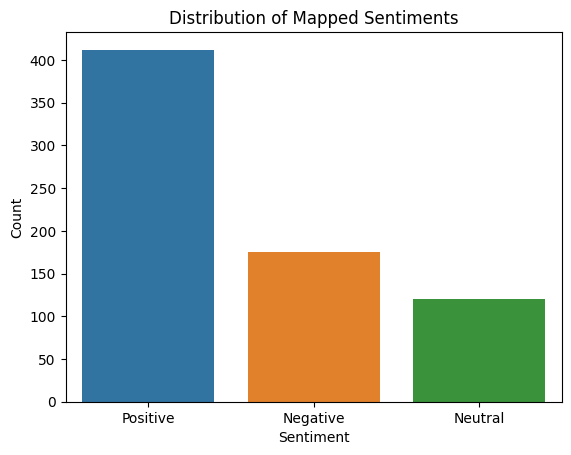

In [13]:
# Plot the distribution of mapped sentiments
sns.countplot(x='Mapped_Sentiment', data=df)
plt.title('Distribution of Mapped Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


we will apply `Random Over Sampler` for Over-sampling

The primary goal of `RandomOverSampler` is to balance the class distribution by randomly duplicating samples from the minority class until the desired class distribution is achieved.

Convert `categorical labels` to `numeric` for resampling

In [14]:
sentiment_mapping_numeric = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
}
df['Mapped_Sentiment_Numeric'] = df['Mapped_Sentiment'].map(sentiment_mapping_numeric)
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Mapped_Sentiment,Mapped_Sentiment_Numeric
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive,1
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative,-1
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Positive,1
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Positive,1
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral,0


Apply `RandomOverSampler` with parameter `sampling_strategy = not majority` : This sampling strategy resamples all classes except the majority class.

Reshape `df['Text']` for RandomOverSampler expects a 2D array, we reshape `df['Text']` accordingly.

Mapped_Sentiment_Numeric
 1    412
-1    412
 0    412
Name: count, dtype: int64


<Axes: ylabel='count'>

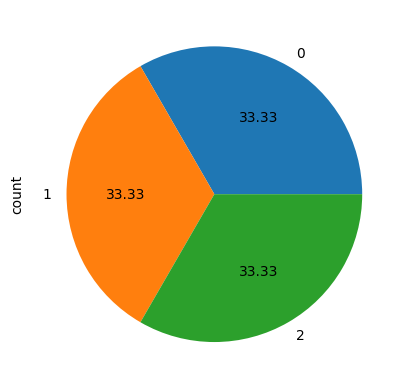

In [15]:
ros = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(df['Text'].values.reshape(-1, 1), 
                                df['Mapped_Sentiment_Numeric'])
print(y_resampled.value_counts())
y_resampled.value_counts().plot.pie(autopct='%.2f', 
                              labels=df['Mapped_Sentiment_Numeric'].index)

Create a new DataFrame for the balanced data

The resampled feature array `X_resampled` is flattened back to a `1D array` before assigning it to the new DataFrame

In [16]:
df_balanced = pd.DataFrame({
    'Text_balanced': X_resampled.flatten(),  # Flatten the 2D array back to 1D
    'Mapped_Sentiment_Numeric_balanced': y_resampled
})
df_balanced.head()

,Text_balanced,Mapped_Sentiment_Numeric_balanced
0,Enjoying a beautiful day at the park! ...,1
1,Traffic was terrible this morning. ...,-1
2,Just finished an amazing workout! 💪 ...,1
3,Excited about the upcoming weekend getaway! ...,1
4,Trying out a new recipe for dinner tonight. ...,0


Now dataset is balanced, so we will save it

In [17]:
df_balanced.to_csv(r"sentimentdataset_balanced.csv")

# Data Preparation

Perform text preprocessing: tokenization, removing stopwords, stemming/lemmatization.

+ **word normalization**

    - PorterStemmer: remove common word endings and suffixes, but the resulting stems may not always be actual words.

    - WordNetLemmatizer: get root form of word in their dictionary definitions.

In [18]:
def preprocess_text(text):
    """
    Excluding some useful words from stop words list, 
    Clean and preprocess text by removing non-alphabetic characters, tokenizing, removing stopwords,
    and applying stemming/lemmatization.
    
    Args:
        text (str): The input text to preprocess.
    
    Returns:
        str: The cleaned and preprocessed text.
    """
    stop_words = set(nltk.corpus.stopwords.words('english'))
    excluding = ['againts', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn',
                "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't",
                'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    stop_words = [word for word in stop_words if word not in excluding]

    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = nltk.tokenize.word_tokenize(text)
    stemmer = nltk.stem.PorterStemmer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    filtered_tokens = [
        lemmatizer.lemmatize(stemmer.stem(token))
        for token in tokens 
        if (not token.isnumeric()) and (len(token) > 2) and (token not in stop_words)
    ]
    return " ".join(filtered_tokens)

df_balanced['Text_balanced_cleaned'] = df_balanced['Text_balanced'].apply(preprocess_text)
df_balanced.head()

,Text_balanced,Mapped_Sentiment_Numeric_balanced,Text_balanced_cleaned
0,Enjoying a beautiful day at the park! ...,1,enjoy beauti day park
1,Traffic was terrible this morning. ...,-1,traffic terribl morn
2,Just finished an amazing workout! 💪 ...,1,finish amaz workout
3,Excited about the upcoming weekend getaway! ...,1,excit upcom weekend getaway
4,Trying out a new recipe for dinner tonight. ...,0,tri new recip dinner tonight


First split: 70% train, 30% temporary (which will be split into val and test)

Second split: 50% of the temporary set goes to validation and 50% goes to test

Result splits are 70% train, 15% validation and 15% test

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(df_balanced['Text_balanced_cleaned'], 
                                                    df_balanced['Mapped_Sentiment_Numeric_balanced'], 
                                                    test_size=0.30, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
                                                test_size=0.50, random_state=42)

print(f"x_train.shape: {X_train.shape} y_train.shape: {y_train.shape}")
print(f"X_val.shape: {X_val.shape} y_val.shape: {y_val.shape}")
print(f"x_test.shape: {X_test.shape} y_test.shape: {y_test.shape}")

x_train.shape: (865,) y_train.shape: (865,)
X_val.shape: (185,) y_val.shape: (185,)
x_test.shape: (186,) y_test.shape: (186,)


we found a problem during evaluation with accuracy score: 

ValueError: Found input variables with inconsistent numbers of samples: [186, 185]

so we will slice test data to be equal to val data

In [20]:
X_test = X_test[:185]
y_test = y_test[:185]

print(f"X_val.shape: {X_val.shape} y_val.shape: {y_val.shape}")
print(f"x_test.shape: {X_test.shape} y_test.shape: {y_test.shape}")

X_val.shape: (185,) y_val.shape: (185,)
x_test.shape: (185,) y_test.shape: (185,)


# Build Machine learning model

+ Build the pipeline

    - makes it easier to train and evaluate the model

    - which allows you to reuse same preprocessing, tokenizing and testing steps on new data without retrain steps

+ Term Frequency Inverse Document Frequency (TFIDF)

    + We can perform feature extraction using the TfidfVectorizer class from the scikit-learn library.
    
    + gives less importance to common words and more importance to rare words that appear in a few documents. 

+ Naive bayes classifier

    + we can perform traning for model using Naive bayes classifier which is fast and simple.


build pipline which contians on TF-IDF with Naive Bayes

In [21]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

+ randomized search

    - help improve the model's performance by finding the best hyperparameters for the TFIDF and Naive Bayes.

In [22]:
params = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'nb__alpha': [0.1, 0.5, 1.0]
}

random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=params,# parameters grid  
                                   n_iter=20,# number of iteration
                                   cv=5)# Cross-validation to evaluate the model's performance
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('nb', MultinomialNB())]),
                   n_iter=20,
                   param_distributions={'nb__alpha': [0.1, 0.5, 1.0],
                                        'tfidf__max_df': [0.5, 0.75, 1.0],
                                        'tfidf__min_df': [1, 2, 3],
                                        'tfidf__ngram_range': [(1, 1), (1, 2),
                                                               (2, 2)]})

In [23]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {round(random_search.best_score_*100)}%")

Best parameters: {'tfidf__ngram_range': (1, 1), 'tfidf__min_df': 1, 'tfidf__max_df': 0.5, 'nb__alpha': 0.1}
Best score: 91%


Now we have best parameters for training


# Model Training

we can train the Naive Bayes model on the training data and labels using the pipeline with the best hyperparameters.

In [24]:
best_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=random_search.best_params_['tfidf__ngram_range'], 
                              max_df=random_search.best_params_['tfidf__max_df'], 
                              min_df=random_search.best_params_['tfidf__min_df'])),
    ('nb', MultinomialNB(alpha=random_search.best_params_['nb__alpha']))
])

best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5)),
                ('nb', MultinomialNB(alpha=0.1))])

# Model Evaluation

make predictions on val data using the trained model

In [25]:
y_pred_val = best_pipeline.predict(X_val)
pd.DataFrame({'y_val':y_val, 'y_pred': y_pred_val})

,y_val,y_pred
707,-1,-1
665,-1,-1
352,1,1
1019,0,0
785,-1,-1
...,...,...
218,0,0
342,1,1
286,-1,-1
1101,0,0


In [26]:
acc_val = accuracy_score(y_val, y_pred_val)
acc_val

0.9351351351351351

+ classification_report

    - helps evalute the performance of a classification model by providing metrics such as 
    
        - precision: calculated as the ratio of `true positive` predictions to the total `predicted positive` and `avoid false positives`.
        
        - recall: calculated as the ratio of `true positive` predictions to the total `predicted positive` and `avoid false negatives`
        
        - F1-score: harmonic `mean of precision and recall`
    
        - **support**: number of samples in class

In [27]:
cr_val = classification_report(y_val, y_pred_val)
print(cr_val)

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        70
           0       0.87      0.98      0.92        54
           1       0.98      0.87      0.92        61

    accuracy                           0.94       185
   macro avg       0.94      0.94      0.93       185
weighted avg       0.94      0.94      0.94       185



+ Confusion matrix Table that shows the 

    - true positive     - true negative

    - false positive    - false negative


In [28]:
cm_val = confusion_matrix(y_val, y_pred_val)
cm_val

array([[67,  3,  0],
       [ 0, 53,  1],
       [ 3,  5, 53]], dtype=int64)

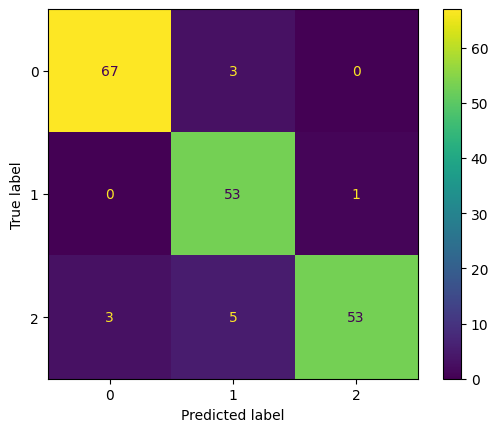

In [29]:
cmd_val = ConfusionMatrixDisplay(cm_val)
cmd_val.plot()

# Model Saving

In [30]:
joblib.dump(best_pipeline,'pipeline_tfidf_nb.pkl') 

['pipeline_tfidf_nb.pkl']

# Model Testing

In [31]:
y_pred_test = best_pipeline.predict(X_test)
pd.DataFrame({'y_test':y_test, 'y_pred_test': y_pred_test})

,y_test,y_pred_test
1066,0,0
536,1,1
731,-1,-1
331,1,1
770,-1,-1
...,...,...
59,1,0
615,1,0
925,-1,-1
328,0,0


In [32]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.9135135135135135

In [33]:
cr_test = classification_report(y_test, y_pred_test)
print(cr_test)

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95        60
           0       0.83      1.00      0.91        60
           1       1.00      0.78      0.88        65

    accuracy                           0.91       185
   macro avg       0.92      0.92      0.91       185
weighted avg       0.93      0.91      0.91       185



In [34]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[58,  2,  0],
       [ 0, 60,  0],
       [ 4, 10, 51]], dtype=int64)

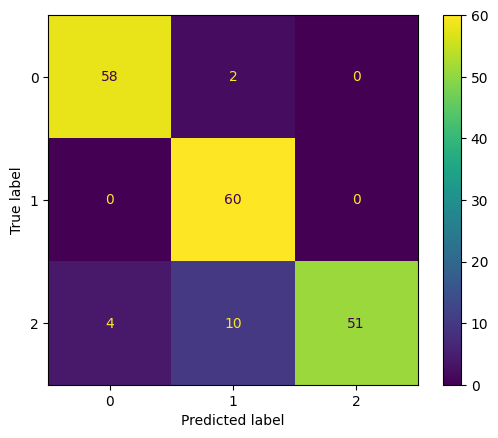

In [35]:
cmd_test = ConfusionMatrixDisplay(cm_test)
cmd_test.plot()

In [36]:
test1 = best_pipeline.predict(["Pray, change your life, and be the best"])
test1

array([1], dtype=int64)

In [37]:
test2 = best_pipeline.predict(["I'm here"])
test2

array([0], dtype=int64)

In [38]:
test3 = best_pipeline.predict(["I am sad"])
test3

array([-1], dtype=int64)

# Build deep learning model

Implement a deep learning model using LSTM

Tokenization: Convert texts to tokens 

In [75]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_balanced['Text_balanced_cleaned'])
vocab_size = len(tokenizer.word_index) + 1
print(f"Word Index: {vocab_size - 1} words")

Word Index: 1960 words


Sequences: Convert tokens to sequences of integers

In [76]:
sequences = tokenizer.texts_to_sequences(df_balanced['Text_balanced_cleaned'])
maxlen = int(np.percentile([len(seq) for seq in sequences], 95))
print(f"Max Sequence Length: {maxlen} words")

Max Sequence Length: 13 words


Padding: Convert Sequences to pad sequences and ensuring all sequences have the same length.

In [77]:
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
labels = df_balanced['Mapped_Sentiment_Numeric_balanced'].values

Split data: 70% train, 15% val and 15% test

In [78]:
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

X_test = X_test[:185]
y_test = y_test[:185]

print(f"x_train.shape: {X_train.shape} x_val.shape: {X_val.shape} x_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape} y_val.shape: {y_val.shape} y_test.shape: {y_test.shape}")

x_train.shape: (865, 13) x_val.shape: (185, 13) x_test.shape: (185, 13)
y_train.shape: (865,) y_val.shape: (185,) y_test.shape: (185,)


`to_categorical` is necessary when you are performing `multi-class classification` with a neural network model like LSTM

Converts `integer labels` into `one-hot encoded vectors` (format expected for neural networks)

In [79]:
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
print(f"y_train.shape: {y_train.shape} y_val.shape: {y_val.shape} y_test.shape: {y_test.shape}")

y_train.shape: (865, 3) y_val.shape: (185, 3) y_test.shape: (185, 3)


Build LSTM model

In [81]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 
                           output_dim=64, 
                           input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(32, activation='tanh', 
                                           return_sequences=True)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Flatten())  # Flatten the output to match the dense layer input
model.add(layers.Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01))) # decrease overfitting

model.compile(optimizer=optimizers.Adam(), # update weights
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 13, 64)            125504    
                                                                 
 bidirectional_6 (Bidirecti  (None, 13, 64)            24832     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 13, 64)            0         
                                                                 
 dense_24 (Dense)            (None, 13, 128)           8320      
                                                                 
 dense_25 (Dense)            (None, 13, 256)           33024     
                                                                 
 dense_26 (Dense)            (None, 13, 128)           32896     
                                                      

In [84]:
# Train the model
hist = model.fit(X_train,
          y_train,
          epochs=20,
          validation_data=(X_val, y_val)
          )
hist.history

Epoch 1/20


28/28 [==============================] - 7s 53ms/step - loss: 1.1326 - accuracy: 0.3364 - val_loss: 1.1102 - val_accuracy: 0.4486
Epoch 2/20
28/28 [==============================] - 0s 15ms/step - loss: 0.9909 - accuracy: 0.5168 - val_loss: 0.6934 - val_accuracy: 0.6919
Epoch 3/20
28/28 [==============================] - 0s 15ms/step - loss: 0.2497 - accuracy: 0.9272 - val_loss: 0.5110 - val_accuracy: 0.8973
Epoch 4/20
28/28 [==============================] - 0s 17ms/step - loss: 0.0427 - accuracy: 0.9931 - val_loss: 0.3869 - val_accuracy: 0.9297
Epoch 5/20
28/28 [==============================] - 1s 21ms/step - loss: 0.0245 - accuracy: 0.9977 - val_loss: 0.3476 - val_accuracy: 0.9189
Epoch 6/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0180 - accuracy: 0.9988 - val_loss: 0.4688 - val_accuracy: 0.9243
Epoch 7/20
28/28 [==============================] - 0s 17ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.3585 - val_accuracy: 0.9297
Epoch 8/20


{'loss': [1.1326364278793335,
  0.9909493923187256,
  0.24966824054718018,
  0.04270795360207558,
  0.024470746517181396,
  0.018045740202069283,
  0.013541131280362606,
  0.011234576813876629,
  0.009436170570552349,
  0.008027883246541023,
  0.006894021760672331,
  0.0058333491906523705,
  0.005093462765216827,
  0.004275546409189701,
  0.0037154112942516804,
  0.0032490710727870464,
  0.0027553034014999866,
  0.0023541694972664118,
  0.0020041342359036207,
  0.001835904666222632],
 'accuracy': [0.33641618490219116,
  0.5167630314826965,
  0.9271676540374756,
  0.9930635690689087,
  0.9976878762245178,
  0.9988439083099365,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.1102162599563599,
  0.6934468150138855,
  0.5110366940498352,
  0.38692089915275574,
  0.3475564420223236,
  0.4688090682029724,
  0.35849007964134216,
  0.3385806679725647,
  0.33815619349479675,
  0.328178733587265,
  0.3327432870864868,
  0.3245360

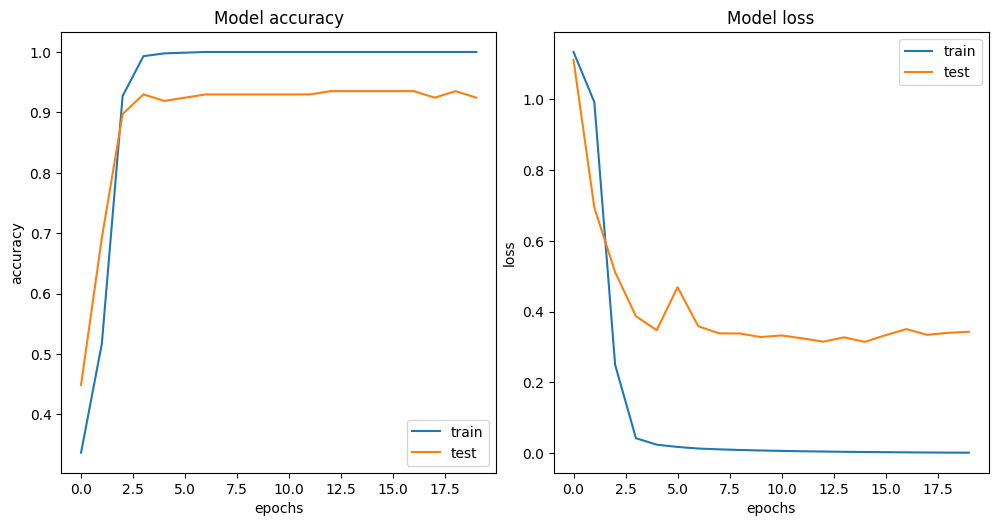

In [85]:
def show_metrics(hist):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax = ax.ravel()
    plt.tight_layout()

    for i, metr in enumerate(['accuracy', 'loss']):
        ax[i].plot(hist.history[metr])
        ax[i].plot(hist.history['val_' + metr])
        ax[i].set_title(f'Model {metr}')
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(metr)
        ax[i].legend(['train', 'test'])

    plt.show()

show_metrics(hist)

# Model Evaluation


In [112]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

6/6 [==============================] - 0s 18ms/step - loss: 0.3430 - accuracy: 0.9243
Validation Loss: 0.34297868609428406
Validation Accuracy: 0.9243243336677551


convert one-hot encoded back to integer labels

In [117]:
y_pred_val_prob = model.predict(X_val) # probabilities
y_pred_val_label = np.argmax(y_pred_val_prob, axis=1) # y_pred
y_val_label = np.argmax(y_val, axis=1) # y_val

6/6 [==============================] - 0s 7ms/step


Classification report

In [119]:
cr_val = classification_report(y_val_label, y_pred_val_label)
print(cr_val)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.95      0.87      0.91        61
           2       0.96      0.93      0.94        70

    accuracy                           0.92       185
   macro avg       0.92      0.93      0.92       185
weighted avg       0.93      0.92      0.92       185



Confusion matrix

In [120]:
cm_val = confusion_matrix(y_val_label, y_pred_val_label)
cm_val

array([[53,  1,  0],
       [ 5, 53,  3],
       [ 3,  2, 65]], dtype=int64)

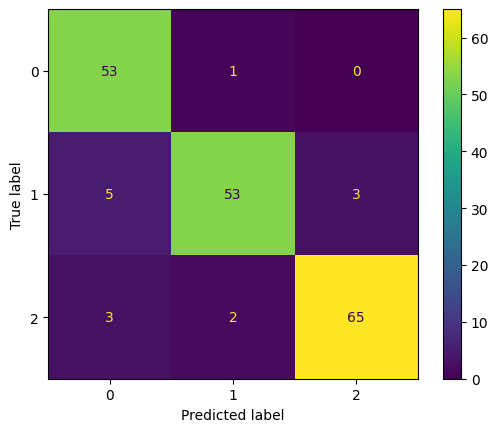

In [121]:
cmd_val = ConfusionMatrixDisplay(cm_val)
cmd_val.plot()

# Model Saving

In [113]:
model.save('model_lstm.h5')

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Testing

In [114]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

6/6 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.9297
Test Loss: 0.24630780518054962
Test Accuracy: 0.929729700088501


convert one-hot encoded back to integer labels

In [122]:
y_pred_test_prob = model.predict(X_test) # probabilities
y_pred_test_label = np.argmax(y_pred_test_prob, axis=1) # y_pred
y_test_label = np.argmax(y_test, axis=1) # y_test

6/6 [==============================] - 0s 10ms/step


Classification report

In [126]:
cr_test = classification_report(y_test_label, y_pred_test_label)
print(cr_test)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       0.98      0.85      0.91        65
           2       0.92      0.95      0.93        60

    accuracy                           0.93       185
   macro avg       0.93      0.93      0.93       185
weighted avg       0.93      0.93      0.93       185



Confusion matrix

In [127]:
cm_test = confusion_matrix(y_test_label, y_pred_test_label)
cm_test

array([[60,  0,  0],
       [ 5, 55,  5],
       [ 2,  1, 57]], dtype=int64)

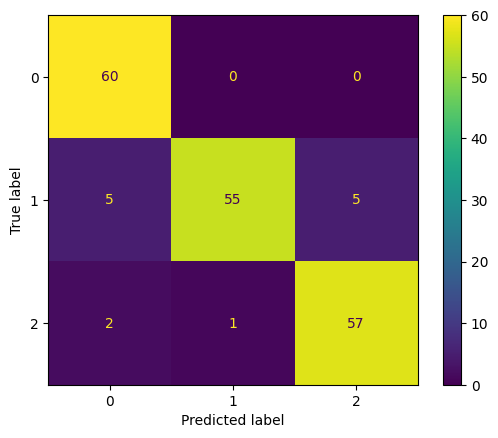

In [128]:
cmd_test = ConfusionMatrixDisplay(cm_test)
cmd_test.plot()

# Models Comparison

in documentation :)